In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *


In [2]:
root = "./0530/"

In [3]:
my = ImageDataLoaders.from_folder(root, 
                                  train='./train/train', valid='test', valid_pct=0.2, 
                                  seed=42, item_tfms=Resize(224,224),
                                  bs=8,num_workers=0,shuffle_train=True)

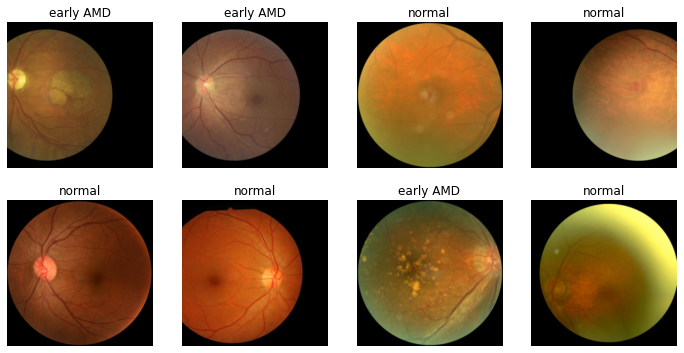

In [4]:
my.show_batch()

In [5]:
learn = cnn_learner(my, resnet50, metrics=accuracy)
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.019511,2.340926,0.400000,01:52


epoch,train_loss,valid_loss,accuracy,time
0,1.048044,2.294060,0.213953,01:22
1,0.727320,1.455761,0.441860,01:20
2,0.713410,1.588242,0.465116,01:22
3,0.624991,0.984483,0.767442,01:19
4,0.606281,1.336786,0.716279,01:20
5,0.535974,0.715251,0.767442,01:20
6,0.458839,1.202401,0.720930,01:26
7,0.393341,0.803037,0.753488,01:28
8,0.315183,0.740445,0.809302,01:23
9,0.281622,0.673647,0.800000,01:28


In [6]:
from fastai.vision.widgets import *

In [15]:
learn.export()

In [21]:
learn_inf = load_learner('D:\\AI\\挑战杯\\2021\\net\\0530\\export.pkl')

In [7]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [10]:
btn_upload = SimpleNamespace(data = ['./0530/train/early AMD/48_right.jpg'])

In [11]:
img = PILImage.create(btn_upload.data[-1])

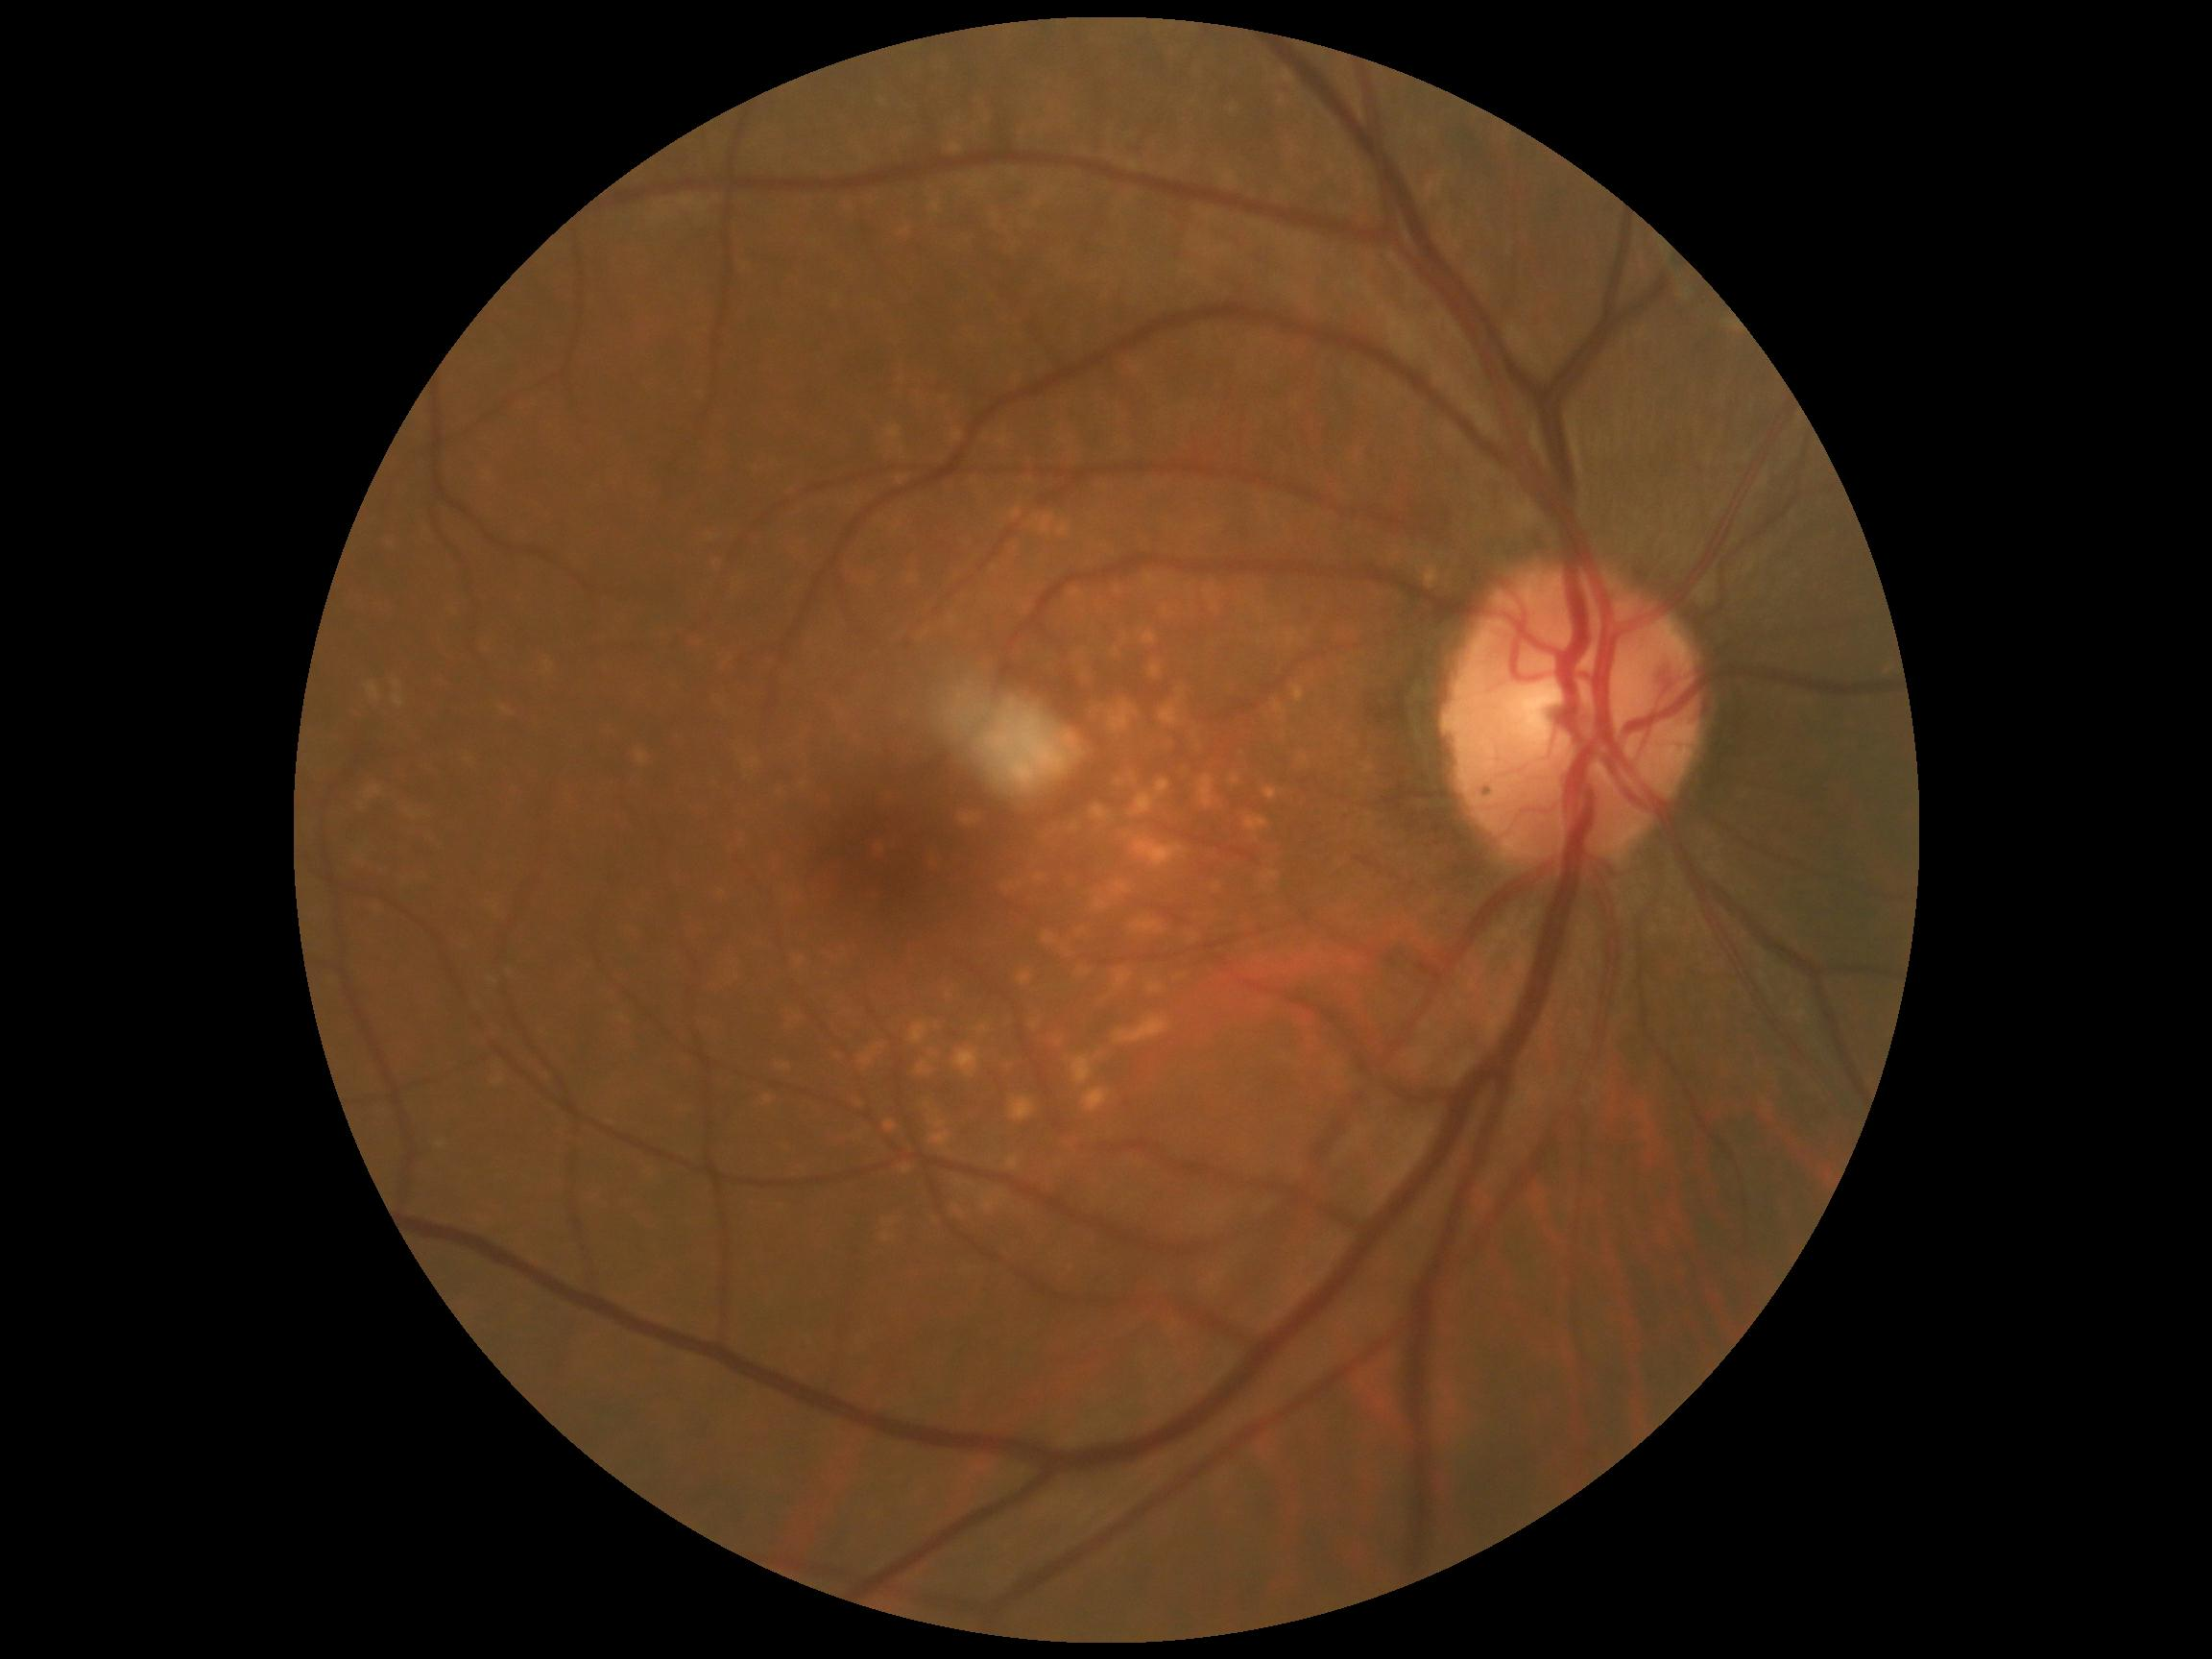

In [12]:
img

In [13]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(224,224))
out_pl

Output()

In [59]:
pred,pred_idx,probs = learn_inf.predict(img)

In [60]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'预测此眼底图片为: {pred}; 可能性: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='预测此眼底图片为: normal; 可能性: 0.8343')

In [62]:
btn_run = widgets.Button(description='机器之眼AI辅助诊断')
btn_run

Button(description='机器之眼AI辅助诊断', style=ButtonStyle())

In [63]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'预测此眼底图片为: {pred}; 可能性: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [64]:
btn_upload = widgets.FileUpload()

In [66]:
VBox([widgets.Label('请点击按钮上传您的眼底图片'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [67]:
!pip install voila

You should consider upgrading via the 'c:\users\soler\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [68]:
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: c:\users\soler\appdata\local\programs\python\python37\etc\jupyter
    - Validating...
      voila 0.2.10 ok


In [18]:
my = ImageDataLoaders.from_folder(root, 
                                  train='./train/train', valid='test', valid_pct=0.3, 
                                  seed=42, item_tfms=Resize(224,224),
                                  bs=8,num_workers=0,shuffle_train=True)

In [19]:
learn = cnn_learner(my, resnet50, metrics=accuracy)

In [20]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.179495,4.417411,0.247678,01:11


epoch,train_loss,valid_loss,accuracy,time
0,1.236117,1.194198,0.582043,01:17
1,0.935951,1.208810,0.616099,01:17
2,0.633372,0.882359,0.780186,01:18
3,0.404702,0.716860,0.780186,01:18
4,0.281881,0.800988,0.777090,01:18


c:\users\soler\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\soler\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\soler\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26202 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\soler\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0, flags=flags)


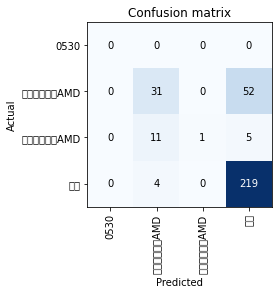

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [ ]:
path = ("./0530")

In [ ]:
path = Path()

In [ ]:
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner('./0530/export.pkl')

In [ ]:
learn_inf.predict('./0530/testimg.jpg')

In [ ]:
learn_inf.dls.vocab

In [ ]:
from fastai.vision.widgets import *

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload